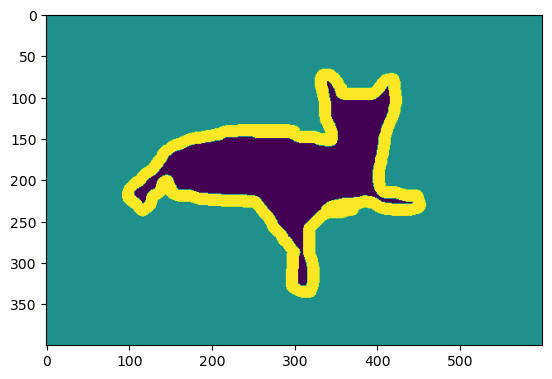

In [10]:
import io
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 使用標準的 open 函數來讀取文件
trimaps_path = "annotations/trimaps/Abyssinian_1.png"
with open(trimaps_path, 'rb') as fid:
    encoded_mask_png = fid.read()


# 將讀取的二進制數據存儲到 BytesIO 對象中
encoded_png_io = io.BytesIO(encoded_mask_png)

# 使用 PIL 庫中的 Image.open 方法打開圖像數據
mask = Image.open(encoded_png_io)

# 將圖像數據轉換為 NumPy 數組並進行變換，然後顯示圖像
plt.imshow(np.array(mask) / 2 * 255)
plt.show()

[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


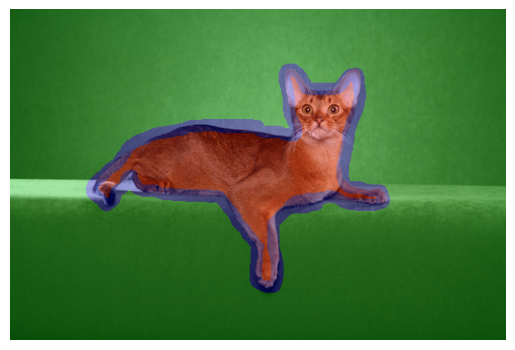

In [9]:
import io
from PIL import Image, UnidentifiedImageError
import matplotlib.pyplot as plt
import numpy as np

# 使用標準的 open 函數來讀取文件
trimaps_path = "annotations/trimaps/Abyssinian_1.png"
image_path = "images/Abyssinian_1.jpg"

try:
    with open(trimaps_path, 'rb') as fid:
        encoded_mask_png = fid.read()
except FileNotFoundError:
    raise ValueError(f"File {trimaps_path} not found. Please check the file path.")

# 將讀取的二進制數據存儲到 BytesIO 對象中
encoded_png_io = io.BytesIO(encoded_mask_png)

# 使用 PIL 庫中的 Image.open 方法打開圖像數據
try:
    mask = Image.open(encoded_png_io)
except UnidentifiedImageError as e:
    raise ValueError("Cannot identify image file. Make sure the file is a valid image format.") from e

# 將圖像數據轉換為 NumPy 數組
mask_array = np.array(mask)
print(mask_array)
print(mask_array / 2 * 255)

# 读取原始图像
try:
    original_image = Image.open(image_path).convert("RGBA")
except FileNotFoundError:
    raise ValueError(f"File {image_path} not found. Please check the file path.")
except UnidentifiedImageError as e:
    raise ValueError("Cannot identify image file. Make sure the file is a valid image format.") from e

# 将掩码图像转换为 RGBA 格式，以便叠加到原始图像上
mask_rgba = Image.new("RGBA", mask.size)
mask_rgba_data = mask_rgba.getdata()

# 创建一个新的 RGBA 图像，将掩码转换为红色的半透明叠加层
new_mask_data = []
for item in mask_array.flatten():
    if item == 1:  # 前景
        new_mask_data.append((255, 0, 0, 64))  # 红色半透明
    elif item == 2:  # 背景
        new_mask_data.append((0, 255, 0, 64))  # 绿色半透明
    else:  # 未分類
        new_mask_data.append((0, 0, 255, 64))  # 藍色半透明
mask_rgba.putdata(new_mask_data)

# 将掩码叠加到原始图像上
combined_image = Image.alpha_composite(original_image, mask_rgba)

# 显示叠加后的图像
plt.imshow(combined_image)
plt.axis('off')  # 不显示坐标轴
plt.show()
